# Ejercicio final del módulo 2

El punto de partida es la consideración de que existe un gran problema con la vivienda y el turismo de alquiler de AirBnb en ciudades. Vamos a trabajar con un `dataset` para analizar este problema. 

Se sabe que muchos propietarios privados encuentran más rentable y lucrativo alquilar pisos a turistas que a locales (especialmente en los centros de las ciudades), y muchas agencias inmobiliarias compran propiedades y las convierten también en alojamientos turísticos. Todo esto tiene como efecto reducir la oferta, aumentar los precios y empujar a los comercios locales a otros barrios, dejando solo a los turistas en el centro.

Con esto en mente, y sabiendo que Airbnb es hoy en día uno de los mercados en línea más populares para alojamiento, investigaremos los datos para:

- Por un lado evaluar el impacto que tiene Airbnb en la vivienda (en este caso se analiza la ciudad de Madrid).

- Por otro lado indagar sobre quién, cuándo y cómo se alquila y posiblemente hacer consideraciones sobre los flujos turísticos.

# Importar librerias

Pandas, numpy y seaborn

## Solución

In [90]:
# Importamos las librerias para trabajar
import wget
import os
import urllib.request
import shutil
import gzip
import pandas as pd
import numpy as np
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

# Gráficos e imágenes
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# ML models
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, LassoLarsCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, r2_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler

# Cargar los anuncios de AirBnb

## Solución

In [91]:
# Importamos el dataset y lo convertimos en dataframe
df = pd.read_csv('datos/airbnb_anuncios.csv', sep = ',')

# Imprimimos filas aleatorias del dataframe
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3463,11689519,Bonito y Recien Reformado APARTAMENTO,50517436,Jose Luis,Arganzuela,Chopera,40.39209,-3.69807,Entire home/apt,55,2,188,2019-08-28,4.91,6,307
11674,27193125,Central and sunny apartment with views to gar...,204761461,Alvaro,Centro,Universidad,40.42654,-3.70412,Entire home/apt,110,2,29,2019-06-02,2.32,1,15
7920,20404178,FREE WiFi Studio Centro Madrid Embajadores,27526991,Leticia Y Fer,Arganzuela,Acacias,40.40321,-3.70471,Hotel room,71,1,20,2019-09-14,0.83,46,335
4129,13610432,Madrid center condo- 30sqm terrace,26517191,Juan Ignacio,Centro,Justicia,40.42203,-3.69494,Entire home/apt,85,3,101,2019-09-04,2.61,1,0
15221,33423391,Low cost cute studio in Lavapies,96019257,Marina,Centro,Embajadores,40.40842,-3.69873,Entire home/apt,60,2,2,2019-07-08,0.65,7,312


# Vea el contenido del dataset y analice las columnas

No siempre tendremos una descripción de las columnas. Analícelas con los siguientes comandos: `shape`, `dtypes` e `info`.

## Solución

In [92]:
# Vemos las colummas y el nombre de filas de nuestro Dataset
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (20837, 16)
Nombre columnas: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [93]:
# Empezamos observando el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20837 non-null  int64  
 1   name                            20832 non-null  object 
 2   host_id                         20837 non-null  int64  
 3   host_name                       20822 non-null  object 
 4   neighbourhood_group             20837 non-null  object 
 5   neighbourhood                   20837 non-null  object 
 6   latitude                        20837 non-null  float64
 7   longitude                       20837 non-null  float64
 8   room_type                       20837 non-null  object 
 9   price                           20837 non-null  int64  
 10  minimum_nights                  20837 non-null  int64  
 11  number_of_reviews               20837 non-null  int64  
 12  last_review                     

# Valores duplicados

Analice  los valores duplicados por las columnas.

Use el comando `duplicated` junto con `sum`.

En esta ocasión quite los valores duplicados con `drop_duplicates`.

## Solución

In [94]:
# Vemos si hay valores duplicados
df.duplicated().sum()

0

# Compruebe los valores nulos

Para ello use `isnull` junto con `sum`.

## Solución

In [95]:
# Vemos los valores nulos de nuestro dataframe listings
print('En total hay', df.isnull().sum().sum(), 'valores nulos en el dataframe repartidos de la siguiente manera:')
df.isnull().sum()

En total hay 9328 valores nulos en el dataframe repartidos de la siguiente manera:


id                                   0
name                                 5
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4654
reviews_per_month                 4654
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [96]:
# Visualizamos nulos con sus respectivos porcentajes
missing_values = df.isnull().sum()
missing_values = missing_values.to_frame().rename(columns = {0:'nulos'})
missing_values['porcentaje'] = df.isnull().sum()*100/df.shape[0]
missing_values = missing_values.sort_values(by = ['nulos'], ascending = False)
missing_values[missing_values['porcentaje'] > 0]

,nulos,porcentaje
last_review,4654,22.335269
reviews_per_month,4654,22.335269
host_name,15,0.071987
name,5,0.023996


# Limpieza de columnas

Elimine las columnas `nombre`, `id`, `host_name` y `last_review`.

## Solución

In [97]:
# Eliminamos las columnas deseadas menos id que a lo mejor la necesitaremos más adelante
df = df.drop(['name', 'host_name', 'last_review'], axis=1)

# Análisis de los barrios

Analice la columna `neighbourhood_group` y contee los valores. Use el parámetro `normalize` con valores `True` o `False` para ver su utilidad.

Link de referencia: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

## Solución

In [98]:
# Primero vemos cuales son los valores uniques de 'neighbourhood_group'
df['neighbourhood_group'].unique()

array(['Chamartín', 'Latina', 'Centro', 'Arganzuela', 'Salamanca',
       'Tetuán', 'Fuencarral - El Pardo', 'Ciudad Lineal', 'Chamberí',
       'Villaverde', 'Hortaleza', 'Moncloa - Aravaca', 'Carabanchel',
       'Retiro', 'San Blas - Canillejas', 'Villa de Vallecas', 'Barajas',
       'Usera', 'Puente de Vallecas', 'Moratalaz', 'Vicálvaro'],
      dtype=object)

In [99]:
# Normalize=True muestra la frecuencia de los datos
df['neighbourhood_group'].value_counts(normalize=True)

Centro                   0.469021
Salamanca                0.065988
Chamberí                 0.063877
Arganzuela               0.053799
Tetuán                   0.040217
Carabanchel              0.032538
Retiro                   0.031914
Latina                   0.029563
Ciudad Lineal            0.029419
Puente de Vallecas       0.028363
Chamartín                0.026443
Moncloa - Aravaca        0.026011
San Blas - Canillejas    0.025148
Usera                    0.017325
Hortaleza                0.015933
Fuencarral - El Pardo    0.014397
Villaverde               0.007967
Barajas                  0.007919
Moratalaz                0.006095
Villa de Vallecas        0.004943
Vicálvaro                0.003119
Name: neighbourhood_group, dtype: float64

In [100]:
# Normalize=False muestra el conteo de los datos
df['neighbourhood_group'].value_counts(normalize=False)

Centro                   9773
Salamanca                1375
Chamberí                 1331
Arganzuela               1121
Tetuán                    838
Carabanchel               678
Retiro                    665
Latina                    616
Ciudad Lineal             613
Puente de Vallecas        591
Chamartín                 551
Moncloa - Aravaca         542
San Blas - Canillejas     524
Usera                     361
Hortaleza                 332
Fuencarral - El Pardo     300
Villaverde                166
Barajas                   165
Moratalaz                 127
Villa de Vallecas         103
Vicálvaro                  65
Name: neighbourhood_group, dtype: int64

# Tratamiento de la columna `reviews_per_month`

Ponga a 0 aquellos valores nulos de la columna con el comando `fillna`.

## Solución

In [101]:
# Volvemos a ver cuantos valores nulos tenia la columna
df['reviews_per_month'].isnull().sum()

4654

In [102]:
# Ponemos a zero los valores nulos anteriores
df = df.fillna(value={'reviews_per_month': 0})

In [103]:
# Comprobamos
df['reviews_per_month'].isnull().sum()

0

# Quite aquellos valores nulos de las columnas restantes


## Solución

In [104]:
# Vemos si hay más valores nulos
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

No hay más valores nulos que sacar.

# Uee el comando `describe` para ver el estado de los datos



## Solución

In [105]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.083700e+04,2.083700e+04,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000
mean,2.356026e+07,1.014144e+08,40.420548,-3.694500,134.065364,4.373614,35.163891,1.521432,12.188559,155.097567
std,1.083667e+07,8.956078e+07,0.021881,0.027793,381.207575,20.428777,61.863053,1.916618,32.156130,133.746263
min,6.369000e+03,5.154000e+03,40.319480,-3.890940,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.608985e+07,2.232182e+07,40.409550,-3.707490,40.000000,1.000000,1.000000,0.070000,1.000000,17.000000
50%,2.459474e+07,7.574288e+07,40.418900,-3.701180,65.000000,2.000000,8.000000,0.750000,2.000000,123.000000
75%,3.401318e+07,1.719263e+08,40.429020,-3.689110,100.000000,3.000000,42.000000,2.360000,7.000000,300.000000
max,3.873002e+07,2.960847e+08,40.573990,-3.527660,9999.000000,1125.000000,594.000000,34.230000,231.000000,365.000000


# Analice la correlación de las variables

Use el comando `corr` y de Seaborn use `heatmap` para respresentarlo.

Importe la librería `matplotlib` para facilitar la representación de los futuros gráficos.

`import matplotlib.pyplot as plt`

 **¿Qué observa con las correlaciones?**

## Solución

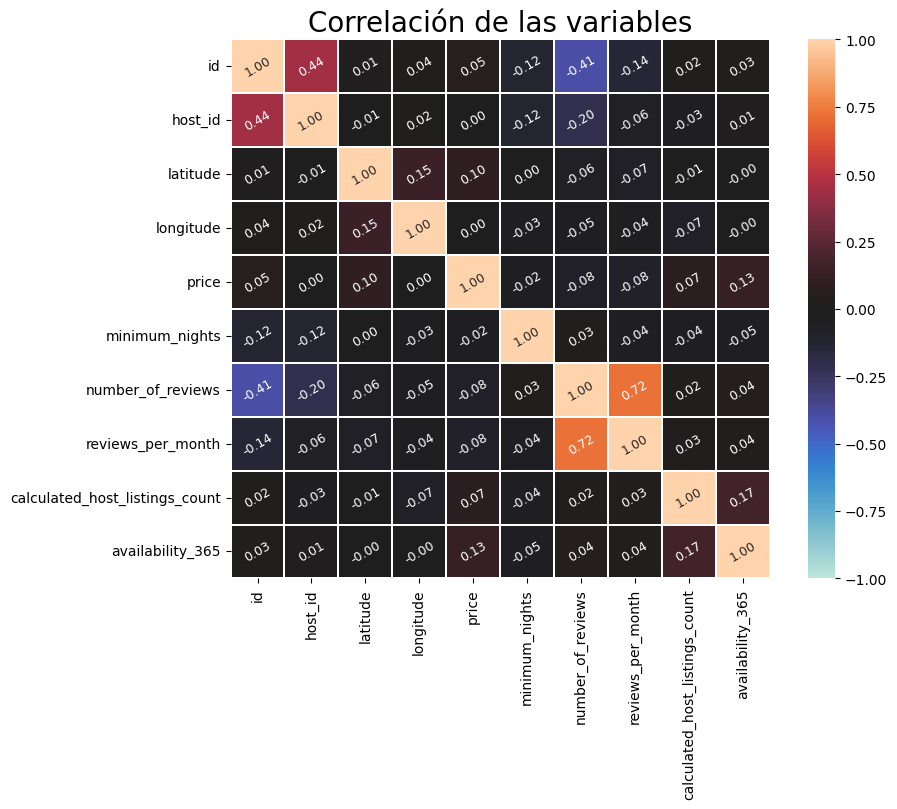

In [106]:
# Gráficamos la matriz de correlación
corr = df.corr(method='kendall')
plt.figure(figsize=(10,7))
plt.title('Correlación de las variables', fontsize=20)
sns.heatmap(corr, annot=True, annot_kws={"size": 9, 'rotation': 30}, vmin=-1.0, vmax=1.0, center=0, square=True, linewidths=0.1, fmt='.2f');

# Identifique los barrios del dataset

Use el comando `unique` en la columna `neighbourhood_group`.

## Solución

In [107]:
# Primero vemos cuales son los valores uniques de 'neighbourhood_group'
df['neighbourhood_group'].unique()

array(['Chamartín', 'Latina', 'Centro', 'Arganzuela', 'Salamanca',
       'Tetuán', 'Fuencarral - El Pardo', 'Ciudad Lineal', 'Chamberí',
       'Villaverde', 'Hortaleza', 'Moncloa - Aravaca', 'Carabanchel',
       'Retiro', 'San Blas - Canillejas', 'Villa de Vallecas', 'Barajas',
       'Usera', 'Puente de Vallecas', 'Moratalaz', 'Vicálvaro'],
      dtype=object)

# Represente los barrios y su importancia

Use `countplot` de `Seaborn` en la columna `neighbourhood_group`.

## Solución

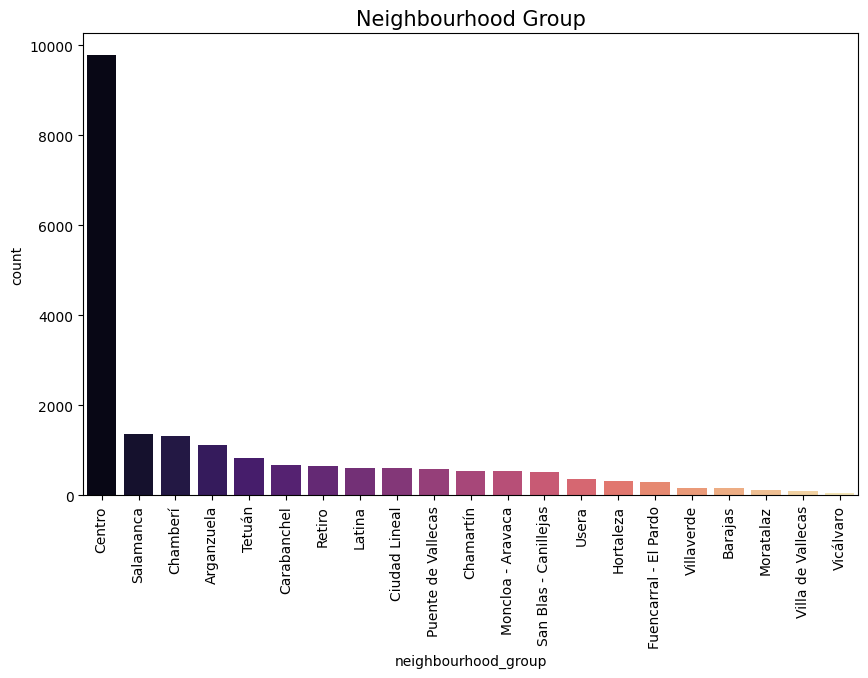

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'neighbourhood_group', order = df['neighbourhood_group'].value_counts().index, palette="magma")
plt.title('Neighbourhood Group', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Vemos que la gran mayoria de airbnbs estan en el **centro**.

# Realice ahora una representación de los barrios por separado y sin agrupar.

Use `countplot` de `Seaborn` en la columna `neighbourhood`.

## Solución

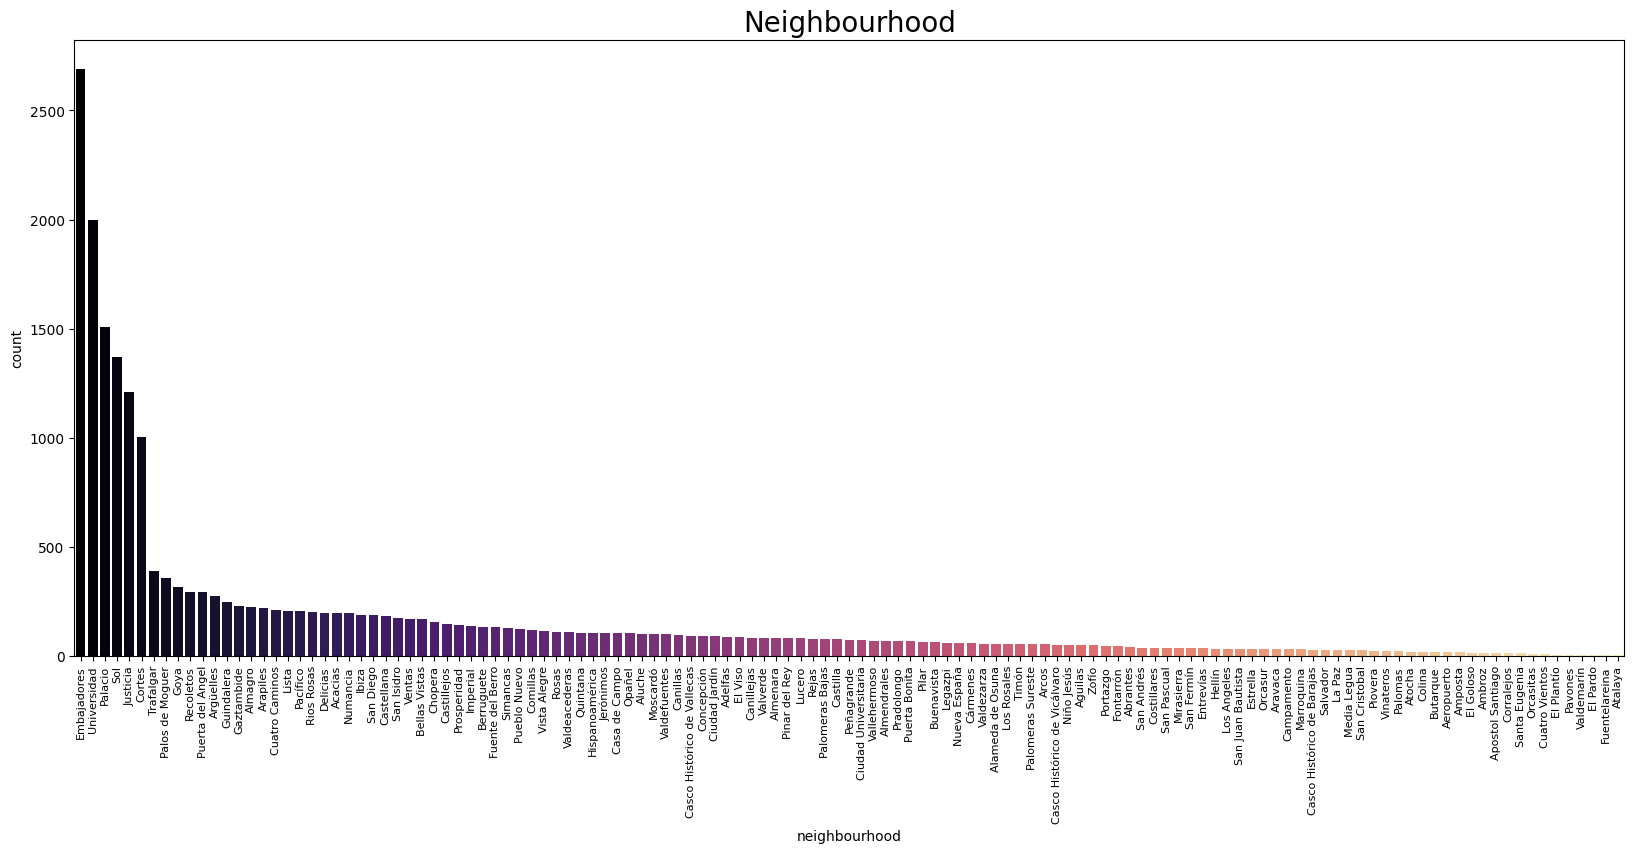

In [109]:
plt.figure(figsize=(20,8))
sns.countplot(data = df, x = 'neighbourhood', order = df['neighbourhood'].value_counts().index, palette="magma")
plt.title('Neighbourhood', fontsize=20)
plt.xticks(rotation=90, fontsize=8)
plt.show()

Visto también el gráfico anterior, los vecindarios de **Embajadores, Universidad, Palacio, Sol, Justicia y Cortes** seguramente pertenecen al **centro**.

# Represente los tipos de habitación que se ofertan

Use la columna `room_type`.

## Solución

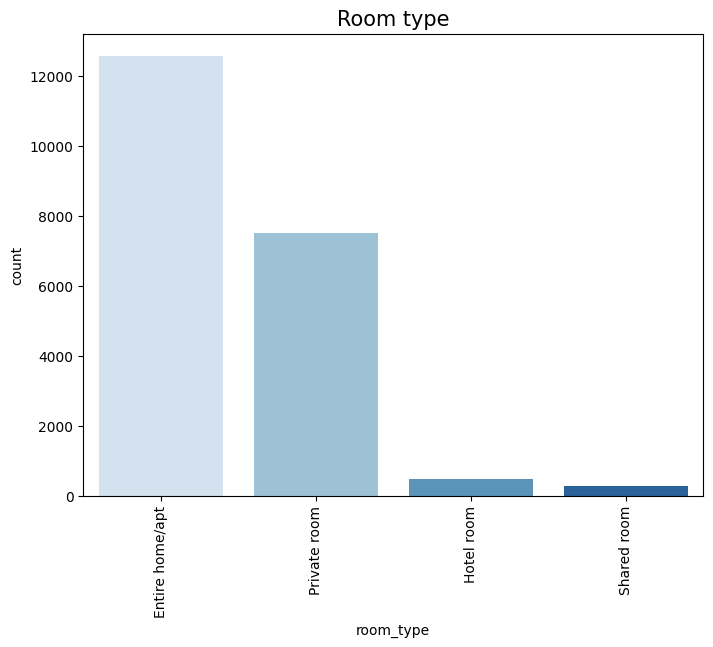

In [110]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'room_type', order = df['room_type'].value_counts().index, palette="Blues")
plt.title('Room type', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Vemos que la mayoria de airbnbs de Madrid son apartamentos o casas enteras seguidos de habitaciones privadas.

# Relación entre la columna `neighbour_group` y `availability_365` que corresponde a la disponiblidad

Puede usar un `boxplot` de `sns`.
**¿Qué interpreta?**

## Solución

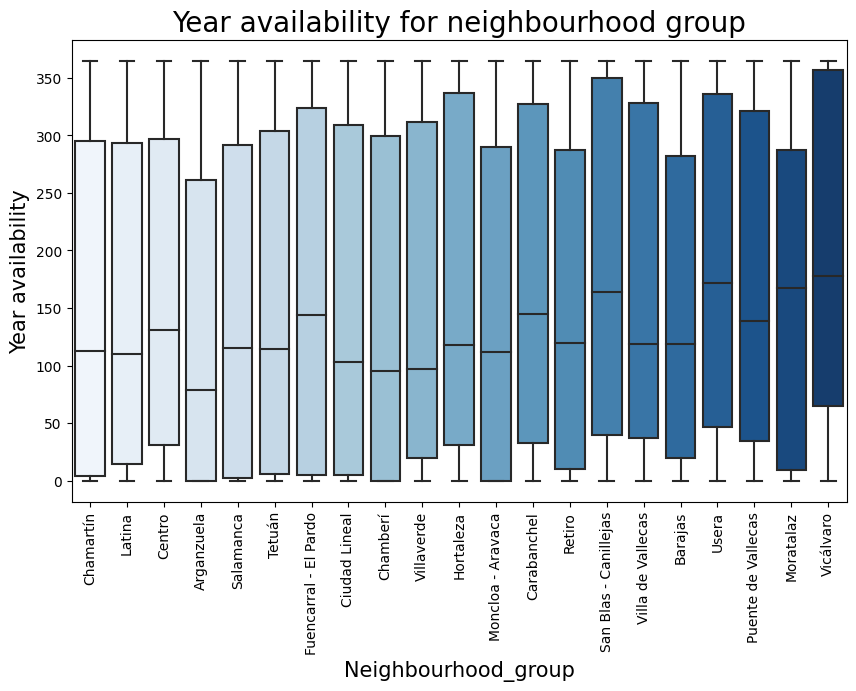

In [111]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='Blues')
plt.title('Year availability for neighbourhood group', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood_group', fontsize=15)
plt.ylabel('Year availability', fontsize=15);

El gráfico boxplot muestra la disponibilidad o cantidad de días en los que se puede alquilar un airbnb en los distintos vecindarios. </br>
Vemos que el barrio más solicitado o el que tiene menos disponibilidad es el barrio de **`Arganzuela`**.
Y el barrio menos solicitado o que tiene más disponibilidad es **`Vicálvaro`**.

# Relicemos un mapa de los grupos de barrios

Use un `scatterplot` de `sns`.

Para ello deberá aportar las columnas `longitude`, `latitude` y como `hue` aporte la columna `neighbourhood_group`.

Link de referencia: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## Solución

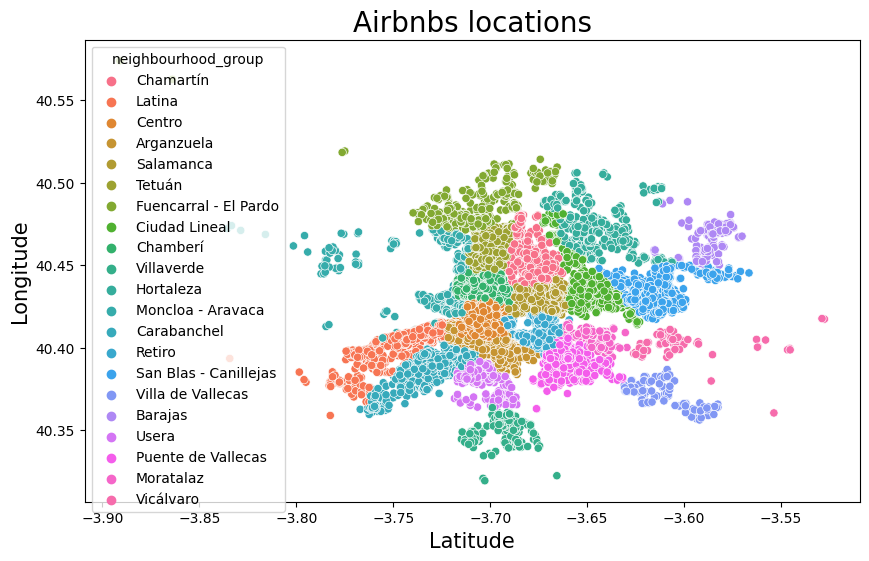

In [112]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'longitude', y = 'latitude' , hue = 'neighbourhood_group')
plt.title('Airbnbs locations', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Longitude', fontsize=15)
plt.show()

Nos descargamos un nuevo dataset

In [113]:
'''# Descargamos el geojson de Madrid
import wget
import os

# Cambiamos el directorio
os.mkdir('datos/')
wget.download('http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2022-12-13/visualisations/neighbourhoods.geojson')'''

"# Descargamos el geojson de Madrid\nimport wget\nimport os\n\n# Cambiamos el directorio\nos.mkdir('datos/')\nwget.download('http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2022-12-13/visualisations/neighbourhoods.geojson')"

In [114]:
# Creamos un mapa interactivo de los precios medios de los airbnb según el vecindario
# Importamos librerías
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

# Importamos el dataframe para plotear el mapa
adam = gpd.read_file("datos/neighbourhoods.geojson")

# Creamos el mapa
freq_neighgroup = df['neighbourhood_group'].value_counts().to_frame().reset_index()
freq_neighgroup = freq_neighgroup.rename(columns = {"index":"neighbourhood_group", "neighbourhood_group":"conteo"})
adam = pd.merge(adam, freq_neighgroup, on='neighbourhood_group', how='left')
adam = adam.dropna()

map_dict = adam.set_index('neighbourhood_group')['conteo'].to_dict()
color_scale = LinearColormap(['green','yellow','orange','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood_group'])
    return color_scale(value)

map1 = folium.Map(location=[40.41633623986386, -3.696237415746122], zoom_start=11.5)
folium.GeoJson(data=adam,
               name='New york',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood_group', 'conteo'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map1)

map1

In [115]:
min(map_dict.values())

65

In [116]:
max(map_dict.values())

9773

In [117]:
'''map_dict = adam.set_index('neighbourhood_group')['conteo'].to_dict()
color_scale = LinearColormap(['green','yellow','orange','yellow','brown'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

In [ ]:
def my_color_function(feature):
    """Maps low values to green and hugh values to red."""
    if unemployment_dict[feature['id']] > 6.5:
        return '#ff0000'
    else:
        return '#008000'

if "model" in thisdict:

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood_group'])
    if value
    return color_scale(value)'''

'map_dict = adam.set_index(\'neighbourhood_group\')[\'conteo\'].to_dict()\ncolor_scale = LinearColormap([\'green\',\'yellow\',\'orange\',\'yellow\',\'brown\'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))\n\nIn [ ]:\ndef my_color_function(feature):\n    """Maps low values to green and hugh values to red."""\n    if unemployment_dict[feature[\'id\']] > 6.5:\n        return \'#ff0000\'\n    else:\n        return \'#008000\'\n\nif "model" in thisdict:\n\ndef get_color(feature):\n    value = map_dict.get(feature[\'properties\'][\'neighbourhood_group\'])\n    if value\n    return color_scale(value)'

# Realice el mapa anterior pero esta vez de los barrios

Siguiendo el comando anterior, use la columna `neighbourhood`.

## Solución

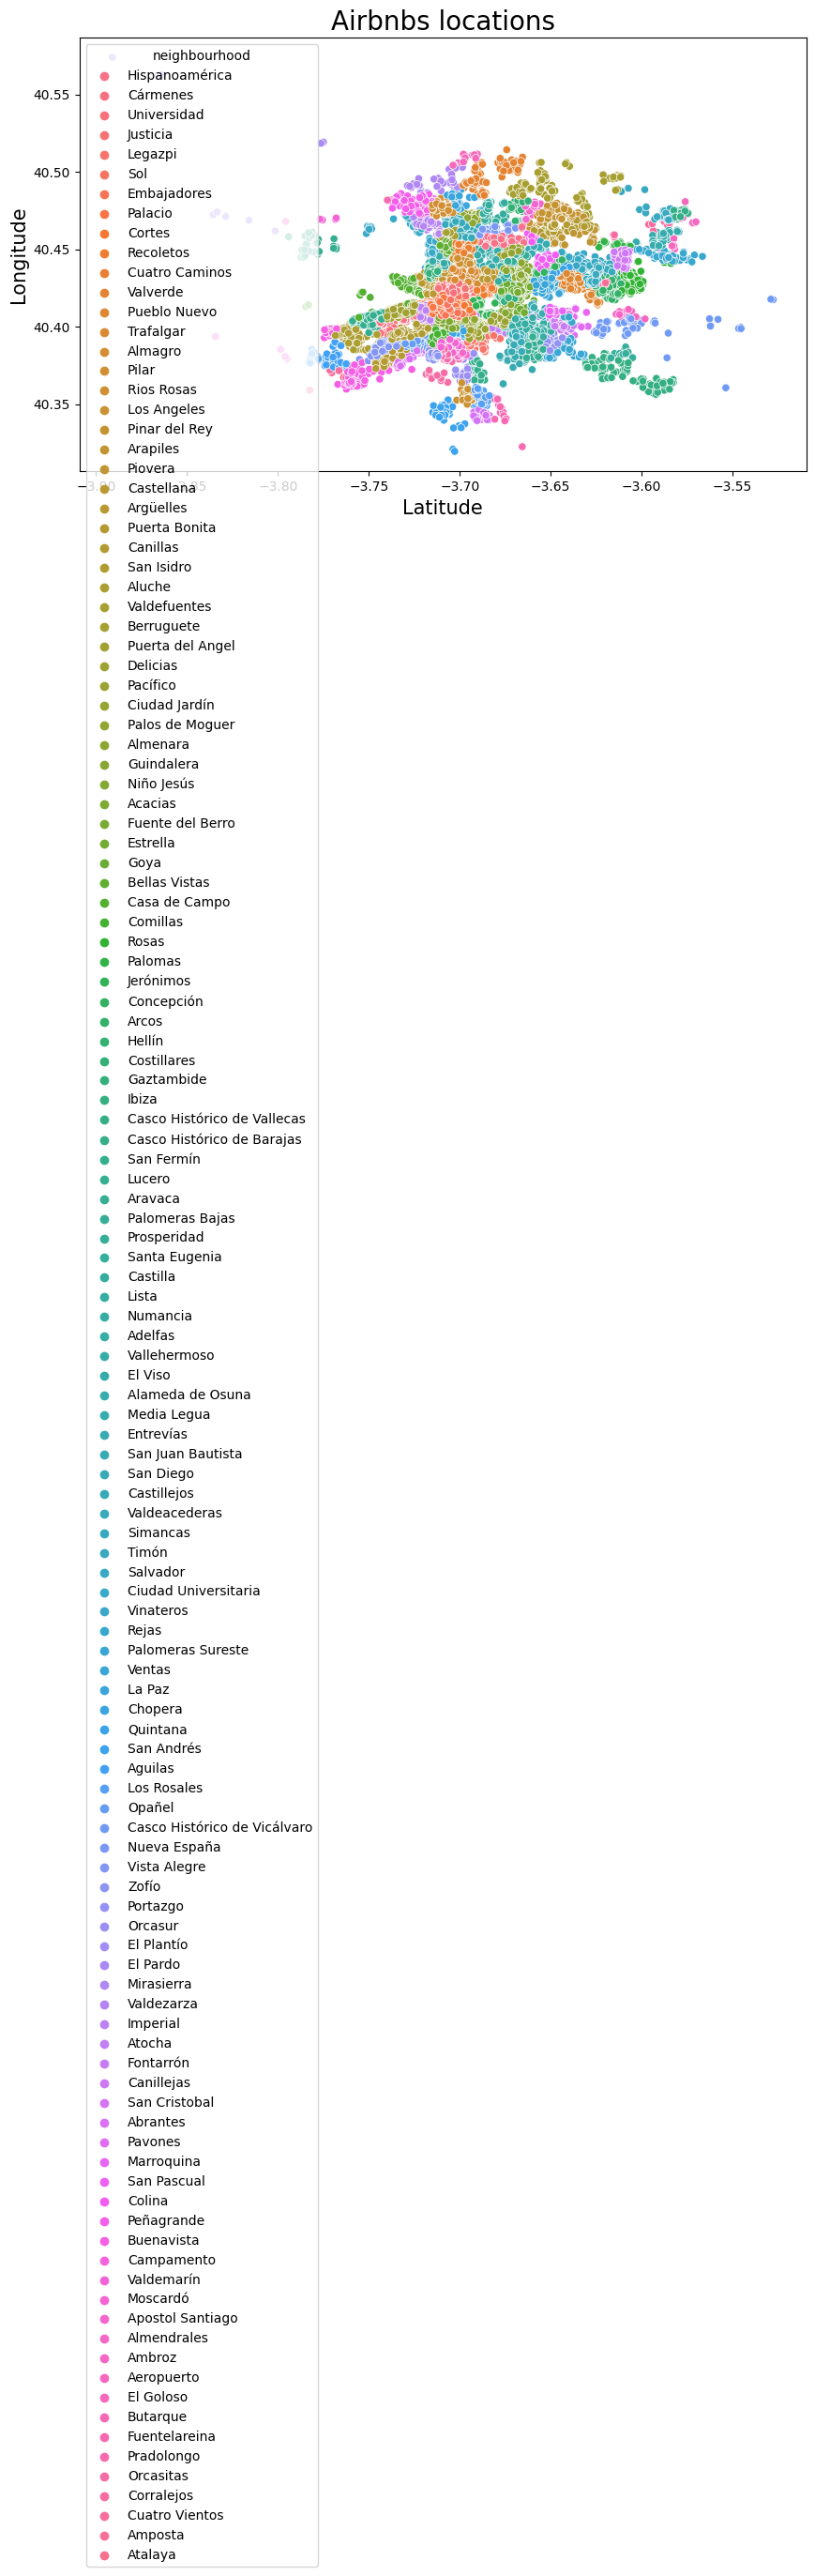

In [118]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'longitude', y = 'latitude' , hue = 'neighbourhood')
plt.title('Airbnbs locations', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Longitude', fontsize=15)
plt.show()

In [119]:
# Creamos un mapa interactivo de los precios medios de los airbnb según el vecindario
# Importamos librerías
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

# Importamos el dataframe para plotear el mapa
adam = gpd.read_file("datos/neighbourhoods.geojson")

# Creamos el mapa
freq_neigh = df['neighbourhood'].value_counts().to_frame().reset_index()
freq_neigh = freq_neigh.rename(columns = {"index":"neighbourhood", "neighbourhood":"conteo"})
adam = pd.merge(adam, freq_neigh, on='neighbourhood', how='left')
adam = adam.dropna()

map_dict = adam.set_index('neighbourhood')['conteo'].to_dict()
color_scale = LinearColormap(['lightgreen','yellow','orange','red','darkred'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map0 = folium.Map(location=[40.41633623986386, -3.696237415746122], zoom_start=11.5)
folium.GeoJson(data=adam,
               name='New york',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'conteo'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map0)

map0

# Cree un mapa sobre el tipo de habitación por barrios

Esta vez, use la columna `room_type`.

**¿Qué indica el gráfico?**

## Solución

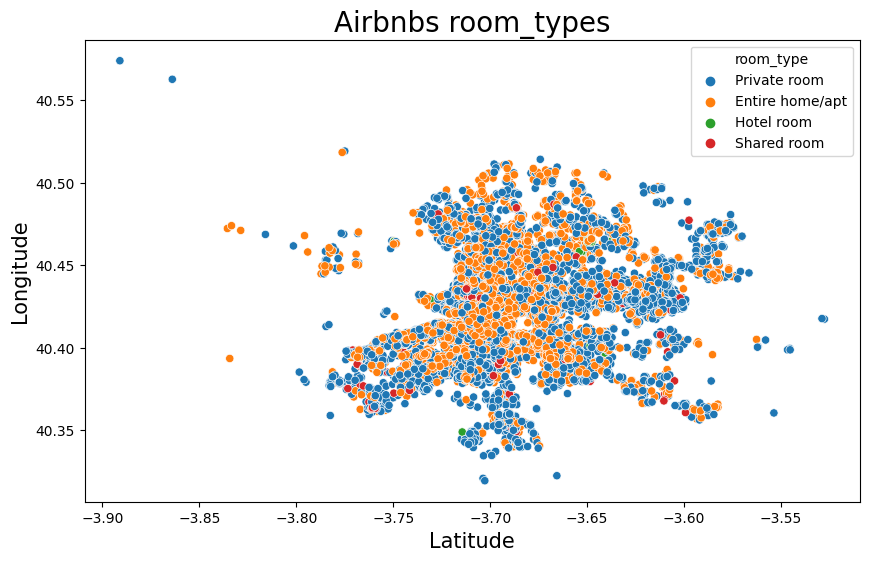

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'longitude', y = 'latitude' , hue = 'room_type')
plt.title('Airbnbs room_types', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Longitude', fontsize=15)
plt.show()

# Disponibilidad de las habitaciones

Cree un mapa para ver la disponibilidad de las habitaciones. 

Para ello use la columna `availability_365`.

## Solución

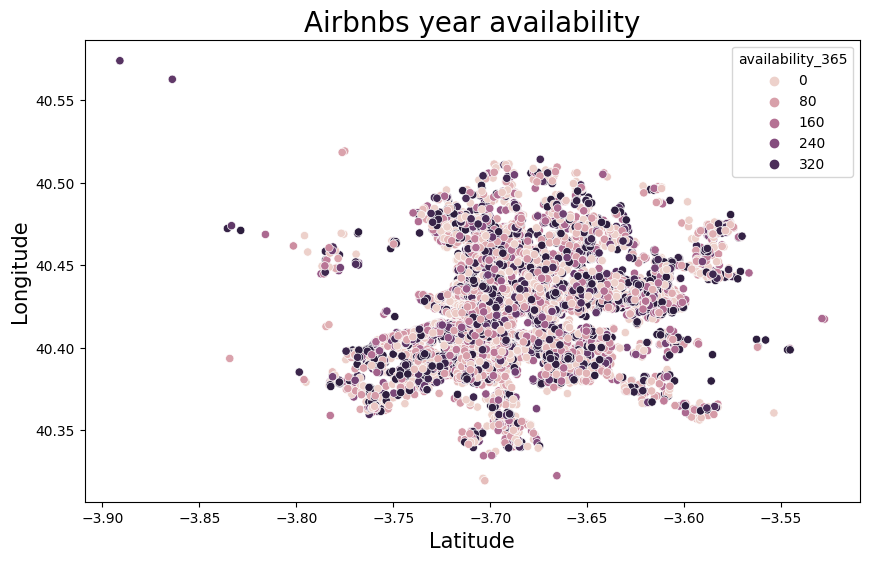

In [121]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'longitude', y = 'latitude' , hue = 'availability_365')
plt.title('Airbnbs year availability', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Longitude', fontsize=15)
plt.show()

## Modelos

## Prueba

In [35]:
# Creamos una copia de nuestro dataframe y lo mostramos otra vez
df2 = df
df2.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,13660,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,0.56,1,53
1,21853,83531,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,0.55,2,48
2,24805,101471,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,0.03,1,354
3,24836,101653,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,0.63,1,301
4,26825,114340,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,1.19,1,337


In [128]:
# Borramos las columnas que creemos que no son necesarias para nuestro modelo
df2 = df2.drop(['host_id', 'reviews_per_month'], axis=1)

In [36]:
# Borramos las columnas que creemos que no son necesarias para nuestro modelo
df2 = df2.drop(['host_id', 'reviews_per_month','latitude', 'longitude', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'], axis=1)

In [161]:
df2 = df2.drop(['neighbourhood_group'], axis=1)

In [37]:
# Transformamos algunas columnas con el LabelEncoder
labelencoder = LabelEncoder()
df2['neighbourhood_group'] = labelencoder.fit_transform(df2['neighbourhood_group'])
df2['neighbourhood'] = labelencoder.fit_transform(df2['neighbourhood'])
df2['room_type'] = labelencoder.fit_transform(df2['room_type'])

In [38]:
# Vemos los cambios del LabelEncoder
df2.head()

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights
0,6369,4,60,2,70,1
1,21853,9,44,2,17,4
2,24805,3,116,0,80,5
3,24836,3,64,0,115,3
4,26825,0,66,2,25,2


C:\Users\marct\AppData\Local\Temp\ipykernel_18220\1073049666.py:10: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



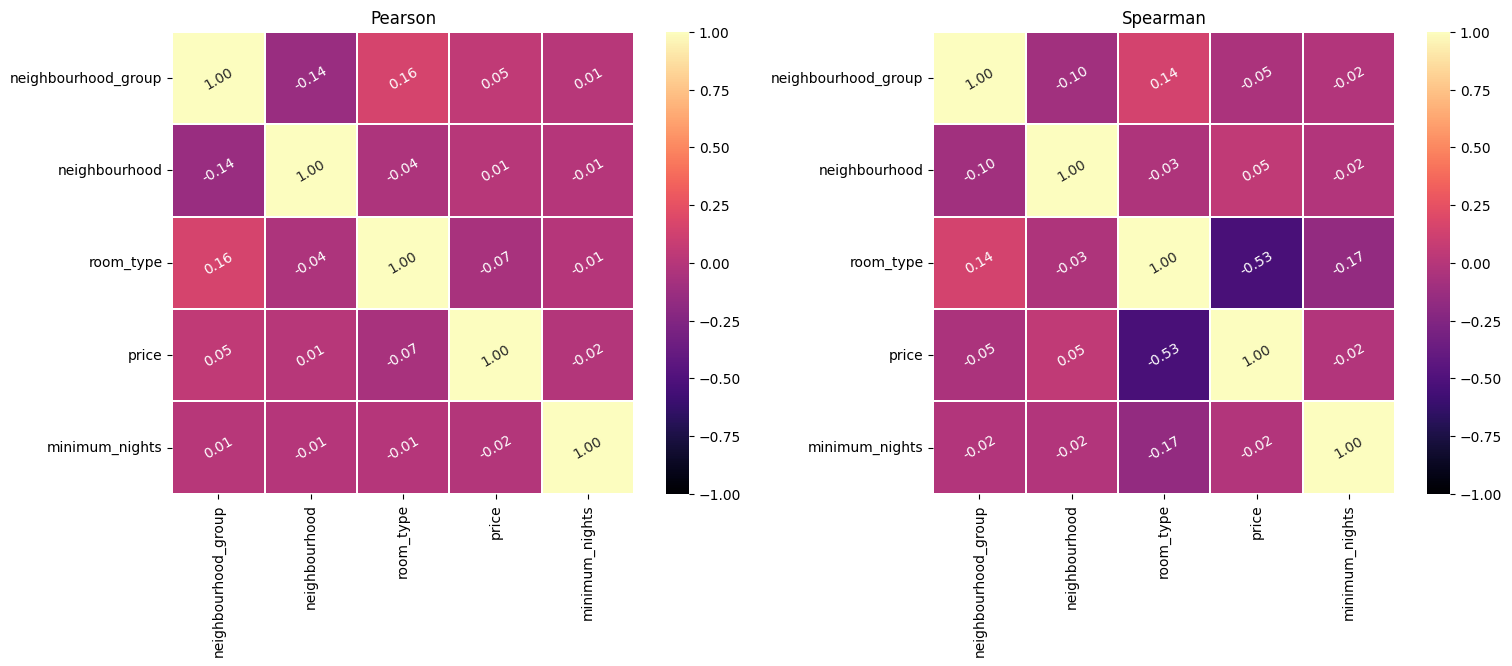

In [39]:
# Creamos una matriz de correlación doble (Pearson y Spearman)
Pearson_matrix = df2.loc[:, df2.columns != 'id'].corr(method = 'pearson')
Spearman_matrix = df2.loc[:, df2.columns != 'id'].corr(method = 'spearman')

fig, ax =plt.subplots(1, 2, figsize=(18,6))
sns.heatmap(Pearson_matrix, annot=True, annot_kws={"size": 10, 'rotation': 30}, vmin=-1.0, vmax=1.0, center=0, square=True, cmap="magma", linewidths=0.1, fmt='.2f', ax=ax[0])
sns.heatmap(Spearman_matrix, annot=True, annot_kws={"size": 10, 'rotation': 30}, vmin=-1.0, vmax=1.0, center=0, square=True, cmap="magma", linewidths=0.1, fmt='.2f', ax=ax[1])
ax[0].set_title('Pearson')
ax[1].set_title('Spearman')
fig.show();

In [130]:
# Escalamos los datos numéricos
scaler = StandardScaler()
scaled = scaler.fit(df2.loc[:, ~df2.columns.isin(['price', 'id'])]).transform(df2.loc[:, ~df2.columns.isin(['price', 'id'])])

In [131]:
# Mostramos los datos escalados
dfs = pd.DataFrame(scaled, columns = ('neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'))
       
dfs = pd.concat([dfs, df2[['price', 'id']]], axis=1)
dfs.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price,id
0,-0.435112,-0.317419,1.633062,0.607012,1.236659,-0.165144,0.482304,-0.347953,-0.763386,70,6369
1,0.550691,-0.787946,-0.783289,-1.667330,1.236659,-0.018289,-0.034980,-0.316854,-0.800771,17,21853
2,-0.632273,1.329422,0.067255,-0.340001,-0.794817,0.030663,-0.536098,-0.347953,1.487198,80,24805
3,-0.632273,-0.199788,-0.027351,-0.112962,-0.794817,-0.067241,0.466139,-0.347953,1.090916,115,24836
4,-1.223755,-0.140972,-1.403031,0.157973,1.236659,-0.116193,1.630028,-0.347953,1.360089,25,26825


In [133]:
# Seleccionamos la variable predictora X y la variable de respuesta Y 
X = dfs.loc[:, ~dfs.columns.isin(['price', 'id'])].values
Y = dfs['price'].values

In [163]:
# Seleccionamos la variable predictora X y la variable de respuesta Y 
X = df2.loc[:, ~df2.columns.isin(['price', 'id'])].values
Y = df2['price'].values

c:\Users\marct\OneDrive\Escritorio\Bootcamp\Workspace\Virtualenv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

c:\Users\marct\OneDrive\Escritorio\Bootcamp\Workspace\Virtualenv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

c:\Users\marct\OneDrive\Escritorio\Bootcamp\Workspace\Virtualenv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

c:\Users\marct\OneDrive\Escritorio\Bootcamp\Workspace\Virtualenv\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

c:\Users\marct\OneDrive\Escritorio\Bootcamp\Workspace\Virtualenv\lib\site-packages\sklearn\model_selection\_split.py:684: Us

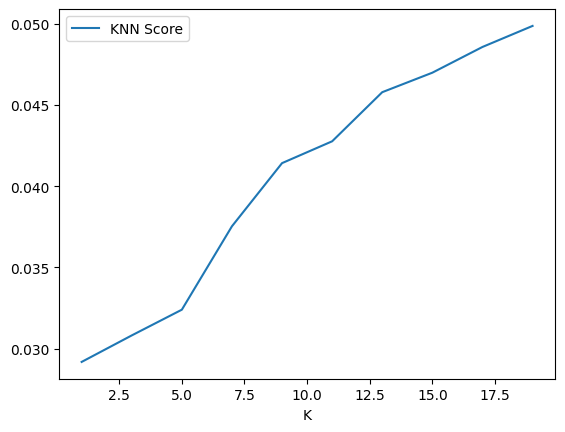

In [134]:
# Calculamos el valor de K (distancia vecinos) que mejor "accuracy" tiene
score_list = []
k_list = []

# Vamos a probar con K del 1 al 20 de dos en dos
for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy")
  k_list.append(k)
  score_list.append(score.mean())

df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

In [164]:
# K-nearest neighbors (KNN)
neigh = KNeighborsClassifier(n_neighbors=5)

# Dividimos en entrenamiento 80% y test 20%
X_train, X_test, y_train, y_test = train_test_split( 
             X, Y, test_size = 0.2, random_state=74) 

# Estandarizamos los datos
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamos el modelo
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [165]:
# Calculate the accuracy of the model 
print(neigh.score(X_test, y_test)) 

0.05206333973128599


-------------------------------------

## Preparación del modelo

In [122]:
# Creamos una copia de nuestro dataframe y lo mostramos otra vez
df3 = df
df3.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,13660,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,0.56,1,53
1,21853,83531,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,0.55,2,48
2,24805,101471,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,0.03,1,354
3,24836,101653,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,0.63,1,301
4,26825,114340,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,1.19,1,337


In [123]:
# Creamos una lista de condiciones
condiciones = [
    (df3['price'] < 50),
    (df3['price'] >= 50) & (df3['price'] < 75),
    (df3['price'] >= 75) & (df3['price'] < 100),
    (df3['price'] >= 100) & (df3['price'] < 125),
    (df3['price'] >= 125) & (df3['price'] < 150),
    (df3['price'] >= 150) & (df3['price'] < 175),
    (df3['price'] >= 175) & (df3['price'] < 200),
    (df3['price'] >= 200) & (df3['price'] < 225),
    (df3['price'] >= 225) & (df3['price'] < 250),
    (df3['price'] >= 250)]

# Creamos una lista de valores en funcion de las condiciones anteriores
valores = ['0-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175-200', '200-225', '225-250', '>250']

# Creamos una nueva columna y le asignamos las condiciones y los valores anteriores con np.select
df3['price_range'] = np.select(condiciones, valores)

In [124]:
# Borramos las columnas que creemos que no son necesarias para nuestro modelo
df3 = df3.drop(['host_id', 'reviews_per_month','latitude', 'longitude', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'minimum_nights', 'price'], axis=1)

In [125]:
# Transformamos algunas columnas con el LabelEncoder
labelencoder = LabelEncoder()
df3['neighbourhood_group'] = labelencoder.fit_transform(df3['neighbourhood_group'])
df3['neighbourhood'] = labelencoder.fit_transform(df3['neighbourhood'])
df3['room_type'] = labelencoder.fit_transform(df3['room_type'])
df3['price_range'] = labelencoder.fit_transform(df3['price_range'])
df3.head()

,id,neighbourhood_group,neighbourhood,room_type,price_range
0,6369,4,60,2,7
1,21853,9,44,2,0
2,24805,3,116,0,8
3,24836,3,64,0,1
4,26825,0,66,2,0


C:\Users\marct\AppData\Local\Temp\ipykernel_18220\2605343425.py:10: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



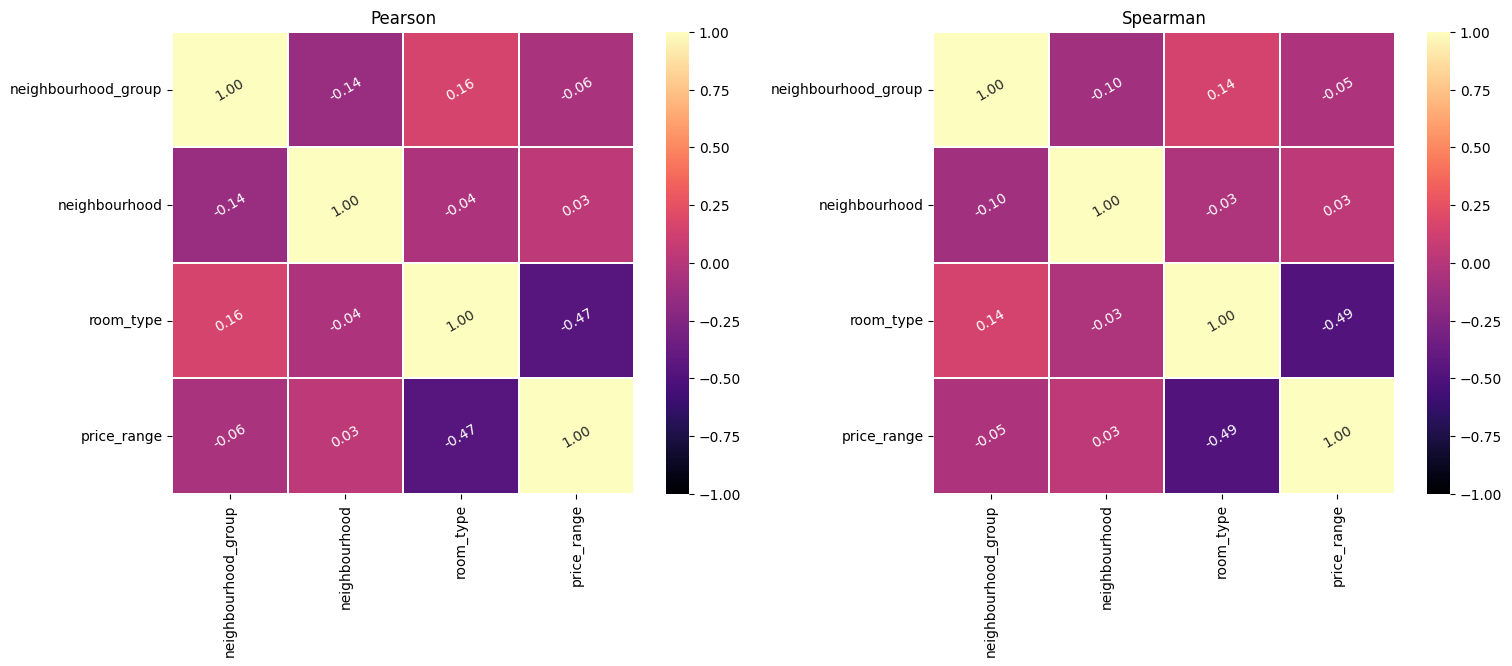

In [126]:
# Creamos una matriz de correlación doble (Pearson y Spearman)
Pearson_matrix2 = df3.loc[:, df3.columns != 'id'].corr(method = 'pearson')
Spearman_matrix2 = df3.loc[:, df3.columns != 'id'].corr(method = 'spearman')

fig, ax =plt.subplots(1, 2, figsize=(18,6))
sns.heatmap(Pearson_matrix2, annot=True, annot_kws={"size": 10, 'rotation': 30}, vmin=-1.0, vmax=1.0, center=0, square=True, cmap="magma", linewidths=0.1, fmt='.2f', ax=ax[0])
sns.heatmap(Spearman_matrix2, annot=True, annot_kws={"size": 10, 'rotation': 30}, vmin=-1.0, vmax=1.0, center=0, square=True, cmap="magma", linewidths=0.1, fmt='.2f', ax=ax[1])
ax[0].set_title('Pearson')
ax[1].set_title('Spearman')
fig.show();

In [138]:
# Seleccionamos la variable predictora X y la variable de respuesta Y 
X2 = df3.loc[:, ~df3.columns.isin(['id', 'price_range'])].values
Y2 = df3['price_range'].values

## Regresión lineal múltiple

In [86]:
# Regresion lineal
regressor = LinearRegression() 

# Dividimos en entrenamiento 80% y test 20%
X2_train, X2_test, y2_train, y2_test = train_test_split( 
             X2, Y2, test_size = 0.2, random_state=74)

# Estandarizamos los datos
scaler2 = StandardScaler()
scaler2.fit(X2_train)

X2_train = scaler2.transform(X2_train)
X2_test = scaler2.transform(X2_test)

# Entrenamos el modelo
regressor.fit(X2_train, y2_train)

LinearRegression()

In [87]:
# Calculate the accuracy of the model 
print(regressor.score(X2_test, y2_test)) 

0.22284931577205214


## Vecinos cercanos KNN

### Clasificación

In [139]:
# K-nearest neighbors (KNN)
neighC = KNeighborsClassifier(n_neighbors=5, weights="uniform", metric="minkowski")

# Dividimos en entrenamiento 80% y test 20%
X2_train, X2_test, y2_train, y2_test = train_test_split( 
             X2, Y2, test_size = 0.2, random_state=74) 

# Estandarizamos los datos
scaler2 = StandardScaler()
scaler2.fit(X2_train)

X2_train = scaler2.transform(X2_train)
X2_test = scaler2.transform(X2_test)

# Entrenamos el modelo
neighC.fit(X2_train, y2_train)

KNeighborsClassifier()

In [140]:
# Calculamos la precisión de nuestro modelo 
print(neighC.score(X2_test, y2_test)) 

0.43042226487523993


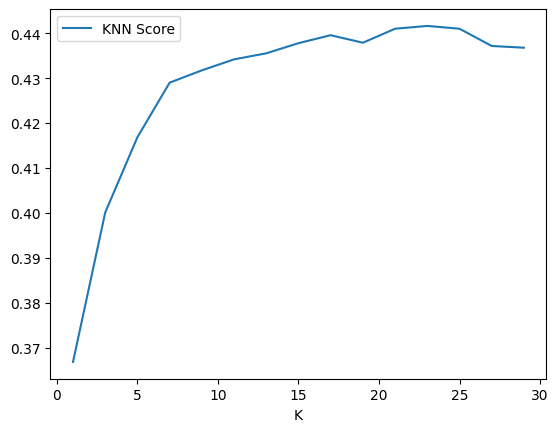

In [137]:
# Calculamos el valor de K (distancia vecinos) que mejor "accuracy" tiene
score_list2 = []
k_list2 = []

# Vamos a probar con K del 1 al 20 de dos en dos
for k in list(range(1, 30, 2)):
  knn_model2 = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  score2 = cross_val_score(knn_model2, X2, Y2, cv=3, scoring="accuracy")
  k_list2.append(k)
  score_list2.append(score2.mean())

df_scores2 = pd.DataFrame({"K":k_list2, 
                   "score":score_list2
                   })

df_scores2.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

Confusion matrix:



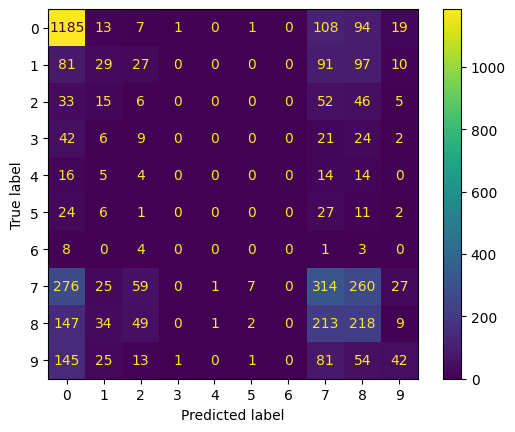

In [142]:
pred2_test = neighC.predict(X2_test)
confusion_matrix(y2_test, pred2_test)


print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(neighC, X2_test, y2_test, cmap= 'viridis')
plt.show()

In [143]:
predicciones = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': pred2_test.flatten()})
predicciones

,Actual,Predicted
0,9,0
1,8,7
2,8,0
3,0,0
4,7,0
...,...,...
4163,9,0
4164,8,0
4165,0,0
4166,0,0


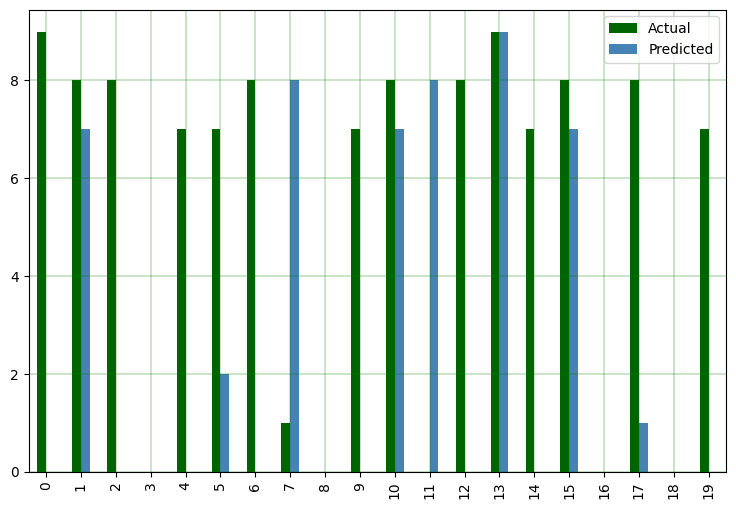

In [144]:
# Comparación predicted vs real 
predicciones = predicciones.head(20)
c='darkgreen', 'steelblue'
predicciones.plot(kind='bar',figsize=(9,6), color=c)
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

https://keepcoding.io/blog/escoger-valor-optimo-de-n-neighbors/

### Regresión

In [146]:
# K-nearest neighbors (KNN)
neighR = KNeighborsRegressor(n_neighbors=5)

# Dividimos en entrenamiento 80% y test 20%
X2_train, X2_test, y2_train, y2_test = train_test_split( 
             X2, Y2, test_size = 0.2, random_state=74) 

# Estandarizamos los datos
scaler2 = StandardScaler()
scaler2.fit(X2_train)

X2_train = scaler2.transform(X2_train)
X2_test = scaler2.transform(X2_test)

# Entrenamos el modelo
neighR.fit(X2_train, y2_train)

KNeighborsRegressor()

In [147]:
# Calculamos la precisión de nuestro modelo 
print(neighR.score(X2_test, y2_test)) 

0.1583111395080259
